# An Analysis of Political Contributions During the 2020 House of Representatives Election (Part II)
Purple pumas: James, Vamsi, and Alex

4. Using your scraped data, investigates different relationships between candidates and the amount of money they raised. Here are some suggestions to get you started, but feel free to pose you own questions or do additional exploration:  
    a. How often does the candidate who raised more money win a race?  
    b. How often does the candidate who spent more money win a race?  
    c. Does the difference between either money raised or money spent seem to influence the likelihood of a candidate winning a race?  
    d. How often does the incumbent candidate win a race?  
    e. Can you detect any relationship between amount of money raised and the incumbent status of a candidate?

## Data Overview
Number of districts: 435

Number of candidates: 894

Number of incumbent:386

Total cash raised: $1,667,849,690

Total cash spent: $1,505,663,124

Total cash on hand: $370,092,954

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup as BS
from IPython.core.display import HTML
import re

In [2]:
open_secrets = pd.read_csv('../data/open_secrets.csv')

In [3]:
open_secrets

,Candidate,Raised,Spent,Cash on Hand,Last Report,Incumbent,Winner,Party,State,District
0,Jerry Carl,1971321,1859349,111973,12/31/2020,False,True,R,AL,1
1,James Averhart,80095,78973,1122,12/31/2020,False,False,D,AL,1
2,Barry Moore,650807,669368,13633,12/31/2020,False,True,R,AL,2
3,Phyllis Harvey-Hall,56050,55988,0,12/31/2020,False,False,D,AL,2
4,Mike D Rogers,1193111,1218564,502234,12/31/2020,True,True,R,AL,3
...,...,...,...,...,...,...,...,...,...,...
889,Tricia Zunker,1261957,1232690,29267,12/31/2020,False,False,D,WI,7
890,Mike Gallagher,3202905,2841801,1169362,12/31/2020,True,True,R,WI,8
891,Amanda Stuck,416978,399916,2165,12/31/2020,False,False,D,WI,8
892,Liz Cheney,3003883,3060167,153567,12/31/2020,True,True,R,WY,1


In [19]:
# top 10 fund raisers
open_secrets.sort_values('Raised', ascending = False).head(10)

,Candidate,Raised,Spent,Cash on Hand,Last Report,Incumbent,Winner,Party,State,District,State_District
354,Steve Scalise,37262827,32830607,6217720,12/31/2020,True,True,R,LA,1,LA1
80,Kevin McCarthy,27780644,24265583,4802133,12/31/2020,True,True,R,CA,23,CA23
60,Nancy Pelosi,27359508,22064953,6299373,12/31/2020,True,True,D,CA,12,CA12
78,Devin Nunes,26825212,20156093,10908033,12/31/2020,True,True,R,CA,22,CA22
547,Alexandria Ocasio-Cortez,20664795,16735422,4297383,12/31/2020,True,True,D,NY,14,NY14
732,Dan Crenshaw,19427865,17596329,1852715,12/31/2020,True,True,R,TX,2,TX2
90,Adam Schiff,19382855,10188664,13908271,12/31/2020,True,True,D,CA,28,CA28
611,Jim Jordan,18313823,12945651,6113812,12/31/2020,True,True,R,OH,4,OH4
121,Katie Porter,16627706,6443700,10267752,12/31/2020,True,True,D,CA,45,CA45
561,Elise Stefanik,13287248,11655936,1983541,12/31/2020,True,True,R,NY,21,NY21


In [4]:
open_secrets['State_District']=open_secrets['State'] + open_secrets['District'].astype(str)

In [5]:
# a. How often does the candidate who raised more money win a race?
df = pd.DataFrame(open_secrets.groupby('State_District')['Raised'].max()).reset_index()
pd.merge(open_secrets, df, how = 'inner')['Winner'].value_counts(normalize = True)

True     0.882759
False    0.117241
Name: Winner, dtype: float64

In [6]:
# b. How often does the candidate who spent more money win a race?
df = pd.DataFrame(open_secrets.groupby('State_District')['Spent'].max()).reset_index()
pd.merge(open_secrets, df, how = 'inner')['Winner'].value_counts(normalize = True)

True     0.875862
False    0.124138
Name: Winner, dtype: float64

In [7]:
 # d. How often does the incumbent candidate win a race?
open_secrets[open_secrets['Incumbent']==True]['Winner'].value_counts(normalize = True)

True     0.96114
False    0.03886
Name: Winner, dtype: float64

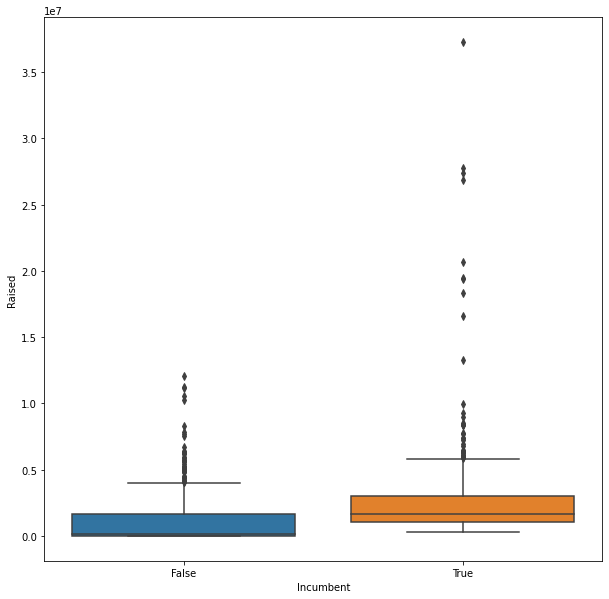

In [8]:
# e. Can you detect any relationship between amount of money raised and the incumbent status of a candidate?
plt.figure(figsize = (10,10))
sns.boxplot(x = 'Incumbent', y='Raised', data = open_secrets);

In [9]:
# winners by party
open_secrets.groupby('Party')['Winner'].sum().sort_values(ascending = False)

Party
D    221
R    210
3      0
I      0
L      0
Name: Winner, dtype: int64

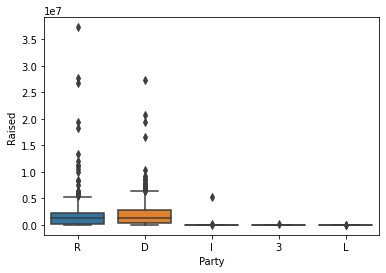

In [10]:
# money raised by Party
sns.boxplot(x='Party',y='Raised', data=open_secrets);

In [11]:
# money raised by Party
open_secrets.groupby('Party')['Raised'].sum().sort_values(ascending = False)

Party
D    898391743
R    762736206
I      5854543
3       616828
L       250370
Name: Raised, dtype: int64

## Bonus Questions:
If you complete all of the above, you can attempt these challenging bonus questions.

Open Secrets also gives a detailed breakdown of contributions by source. For example, for Tennessee's second district, this is located at https://www.opensecrets.org/races/candidates?cycle=2020&id=TN02&spec=N

Scrape these pages to get information on contributions by source. See if you can find anything interesting in terms of the source of contributions. Some examples to get you started:

What does the overall distribution of funding sources look like?
Is there any detectable difference in contribution sources between Democrat and Republican candidates?
Do the funding sources for either the winning candidate or incumbent candidate differ from the other candidates?

In [42]:
# fetch the data from URL of TN02
URL = 'https://www.opensecrets.org/races/candidates?cycle=2020&id=TN02&spec=N'
response = requests.get(URL)
soup = BS(response.text)
funding_source = pd.read_html(str(soup.findAll('table')))[1]
funding_source

,Type of Contribution,Amount,Percentage
0,Small Individual Contributions (≤ $200),"$343,014",25.67%
1,Large Individual Contributions,"$729,831",54.62%
2,PAC Contributions*,"$269,535",20.17%
3,Candidate self-financing,$0,0.00%
4,Other,"-$6,105",-0.46%


In [47]:
funding_source.set_index('Type of Contribution')

,Amount,Percentage
Type of Contribution,,
Small Individual Contributions (≤ $200),"$343,014",25.67%
Large Individual Contributions,"$729,831",54.62%
PAC Contributions*,"$269,535",20.17%
Candidate self-financing,$0,0.00%
Other,"-$6,105",-0.46%


In [44]:
soup.findAll('div', attrs = {'class':'Members'})

[<div class="Members">
 <div class="Members--list">
 <hr class="u-striped-rule u-mt2 u-mb2"/>
 <div class="Members--list-item">
 <div class="Members--bio u-richtext">
 <h2><strong>
 <a href="/members-of-congress/tim-burchett/summary?cid=N00041594">Tim Burchett (R) • <i>Incumbent</i></a>
  • <span class="winner"><i>Winner</i></span> </strong></h2>
 </div>
 <table border="0" cellpadding="1" cellspacing="0" class="Members--table">
 <tr>
 <td>Raised:</td>
 <td class="Members--number">$1,336,276</td>
 <td width="33%">
 <div class="Members--bar-wrapper">
 <div class="Members--bar Members--bar-indivs" style="width:100.0%;"></div>
 </div>
 </td>
 </tr>
 <tr>
 <td>Spent:</td>
 <td class="Members--number">$878,488</td>
 <td width="33%">
 <div class="Members--bar-wrapper">
 <div class="Members--bar Members--bar-indivs" style="width:65.74149310125549%;"></div>
 </div>
 </td>
 </tr>
 <tr>
 <td>Cash on Hand:</td>
 <td class="Members--number">$593,678</td>
 <td width="33%">
 <div class="Members--bar-